# Logistic Classification - Wisconsin Breast Cancer Dataset

## 1. Data Analysis

We are going to analyze the Wisconsin Breast Cancer dataset. It relates many different cellular characteristics to the diagnosis of a patient. The diagnosis comes as 'M' and 'B', for malignant and benign types of cancer. We will convert this to numerical values (1 and 0).

To get some preliminary information about our data, we represent the correlation matrix.

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')
32


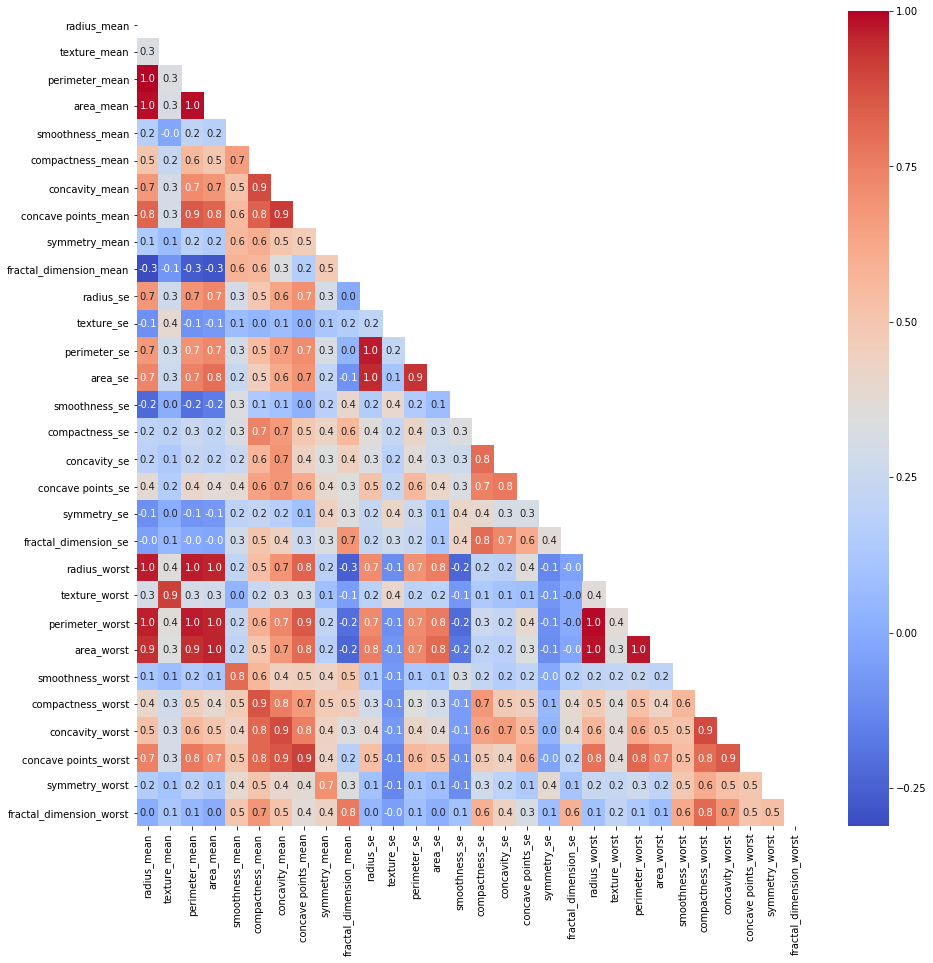

In [2]:
import numpy   as np
import scipy   as sc
import pandas  as pd
import seaborn as sb
import matplotlib.pyplot as plt

df=pd.read_csv('3. Wisconsin_Breast_Cancer_Dataset.csv',)
columns=df.columns
print(columns)
print(len(columns))

Y=df['diagnosis']
X=df.drop(['diagnosis','id'], axis=1)

dict={'M':1, 'B':0}
y=Y.map(dict)

# Correlation Matrix plot - Since it is symmetric, only triangular
fig=plt.figure(figsize=(15,15))
CX=X.corr()
mask = np.zeros_like(CX, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
heat=sb.heatmap(CX,mask=mask,annot=True, fmt='.1f',cmap='coolwarm')
fig.add_subplot(heat)
plt.show()

## 2. Logistic Regression - sklearn

### Simple Logistic Regression

In [2]:
from sklearn.datasets        import load_iris
from sklearn.linear_model    import LogisticRegression
from sklearn.model_selection import train_test_split

print('random_state=0')
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,train_size=0.7,test_size=0.3)
xyfit = LogisticRegression().fit(X_train,Y_train)
TestValue=xyfit.score(X_test,Y_test)
print('Test score:',TestValue)

random_state=0
Test score: 0.9590643274853801


### Simple Logistic Regression - Average over 200 train-test
More realistic value, since we evaluate for different partitions of train-test.

In [3]:
TrainValueVect=[]
TestValueVect=[]

for j in range(0,200):
  X_train, X_test, Y_train, Y_test = train_test_split(X,Y,train_size=0.7,test_size=0.3)
  xyfit = LogisticRegression().fit(X_train,Y_train)
  TestValueVect.append(xyfit.score(X_test,Y_test))
  
MeanTest=np.mean(TestValueVect)
print('Average of Test Score:',MeanTest)

Average of Test Score: 0.9507602339181287


### Adding Polynomial Terms
We include polynomial variables with interactions to our previous logistic regression model. The precision increases slightly.

In [4]:
l2 = []

for i in range(200):
  
  from sklearn.preprocessing import PolynomialFeatures
  from sklearn.preprocessing import scale

  X_train, X_test, Y_train, Y_test = train_test_split(PolynomialFeatures(2).fit_transform(X), Y, test_size=0.3)
  clf  = LogisticRegression().fit(X_train, Y_train)

  l2.append(clf.score(X_test, Y_test))
  
MeanTest=np.mean(l2)
print('Test Score:', MeanTest)

Test Score: 0.9562865497076024


### Scaling of the Variables (without polynomial)
Scaling of our variables to [-1,1].

In [5]:
l3 = []

for i in range(200):
  
  from sklearn.preprocessing import PolynomialFeatures
  from sklearn.preprocessing import scale

  X_train, X_test, Y_train, Y_test = train_test_split(scale(X, with_mean=False), Y, test_size=0.3)
  clf  = LogisticRegression().fit(X_train, Y_train)

  l3.append(clf.score(X_test, Y_test))
  
MeanTest=np.mean(l3)
print('Test Score:', MeanTest)

Test Score: 0.9712865497076024


### Scaling of the Variables (including polynomial)
Scaling of our variables to [-1,1] including previous polynomial term.

In [6]:
l4 = []

for i in range(200):
  
  from sklearn.preprocessing import PolynomialFeatures
  from sklearn.preprocessing import scale

  X_train, X_test, Y_train, Y_test = train_test_split(PolynomialFeatures(2).fit_transform(scale(X, with_mean=False)), Y, test_size=0.3)
  clf  = LogisticRegression().fit(X_train, Y_train)

  l4.append(clf.score(X_test, Y_test))
  
MeanTest=np.mean(l4)
print('Test Score:', MeanTest)

Test Score: 0.9630409356725147


### Mean-Free Scaling of the Variables (without polynomial)
Scaling of our variables to [-1,1] with mean=0.

In [7]:
l5 = []

for i in range(200):
  
  from sklearn.preprocessing import scale

  X_train, X_test, Y_train, Y_test = train_test_split(scale(X, with_mean=True), Y, test_size=0.3)
  clf  = LogisticRegression().fit(X_train, Y_train)

  l5.append(clf.score(X_test, Y_test))
  
np.mean(l5)

0.9771052631578945

### Mean-Free Scaling of the Variables (with polynomial)
Scaling of our variables to [-1,1] with mean=0 including previous polynomial term.

In [9]:
l6 = []

for i in range(200):
  
  from sklearn.preprocessing import PolynomialFeatures
  from sklearn.preprocessing import scale

  X_train, X_test, Y_train, Y_test = train_test_split(PolynomialFeatures(2).fit_transform(scale(X, with_mean=True)), Y, test_size=0.3)
  clf  = LogisticRegression().fit(X_train, Y_train)

  l6.append(clf.score(X_test, Y_test))
  
np.mean(l6)

0.9619298245614035